# ABM Value Change - Explore model outcomes

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tristandewildt/ABM_Value_Change/blob/main/Explore_model_outcomes.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tristandewildt/ABM_Value_Change/blob/main/Explore_model_outcomes.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

# 1. Import files

In [2]:
pip install pandas==1.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 74.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.4.1 which is incompatible.


In [3]:
pip install ema-workbench

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.7 MB/s eta 0:00:00


In [4]:
from ema_workbench.analysis import prim
from ema_workbench.analysis import feature_scoring

import sys
import os

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statistics import mean

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed

from pprint import pprint
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive

from ema_workbench import ema_logging, load_results
ema_logging.log_to_stderr(level=ema_logging.INFO)

from ema_workbench.analysis.plotting import envelopes, lines, kde_over_time
import ema_workbench.analysis.prim as prim

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/ema_workbench/em_framework/evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen impor

In [5]:
!git clone https://www.github.com/tristandewildt/ABM_Value_Change.git

Cloning into 'ABM_Value_Change'...
remote: Enumerating objects: 240, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 240 (delta 92), reused 108 (delta 57), pack-reused 65
Receiving objects: 100% (240/240), 11.46 MiB | 19.40 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [6]:
# Generate file list
local_download_path = os.path.expanduser('ABM_Value_Change/Results')
try:
  os.makedirs(local_download_path)
except: pass

print("Experiments to choose from:")
for filename in os.listdir(local_download_path):
  if filename.startswith("Output_file_results"):
    print("   - "+str(filename))

Experiments to choose from:
   - Output_file_results_512_runs_model_version_v37_Resistance_to_change_value_memory_50_new_MR_count_high_value_memory
   - Output_file_results_512_runs_model_version_v36_Resistance_to_change_value_memory_50
   - Output_file_results_512_runs_model_version_v36_Resistance_to_change_value_memory_50_OTC_20
   - Output_file_results_512_runs_model_version_v36_Resistance_to_change_value_memory_50_high_value_memory
   - Output_file_results_512_runs_model_version_v36_Resistance_to_change_value_memory_50_high_MR_threshold_high_value_memory
   - Output_file_results_512_runs_model_version_v36_Resistance_to_change_high_value_memory
   - Output_file_results_512_runs_model_version_v36_Resistance_to_change_lower_max_neg_impact
   - Output_file_results_512_runs_model_version_v36_Resistance_to_change_value_memory_50_OTC_20_high_value_memory
   - Output_file_results_512_runs_model_version_v36_Resistance_to_change_value_memory_50_MNC_0_high_value_memory
   - Output_file_result

In [7]:
#selected_file = "Output_file_results_512_runs_model_version_v37_Resistance_to_change_value_memory_50_new_MR_count_high_value_memory"
selected_file = "Output_file_results_512_runs_model_version_v36_Resistance_to_change_lower_max_neg_impact"
#selected_file = "Output_file_results_512_runs_model_version_v36_Resistance_to_change_value_memory_50_OTC_20"
#selected_file = "Output_file_results_512_runs_model_version_v36_Resistance_to_change_value_memory_50_OTC_20_high_value_memory"


df_results = pd.read_pickle("ABM_Value_Change/Results/"+str(selected_file))
df_experiments_string = selected_file.replace("results", "experiments" )
df_experiments = pd.read_pickle("ABM_Value_Change/Results/"+str(df_experiments_string))
df_uncertainties_adjust = df_experiments.copy()
list_scenarios = []
list_policy = []
list_model = []
for i in range(len(df_uncertainties_adjust)):
    list_scenarios.append(i)
    list_policy.append("None")
    list_model.append("simpleModel")
df_uncertainties_adjust['scenario'] = list_scenarios
df_uncertainties_adjust['policy'] = list_policy
df_uncertainties_adjust['model'] = list_model
df_uncertainties_adjust.set_index('scenario')
df_uncertainties_adjust['scenario'] = list_scenarios
df_experiments = df_uncertainties_adjust.copy()

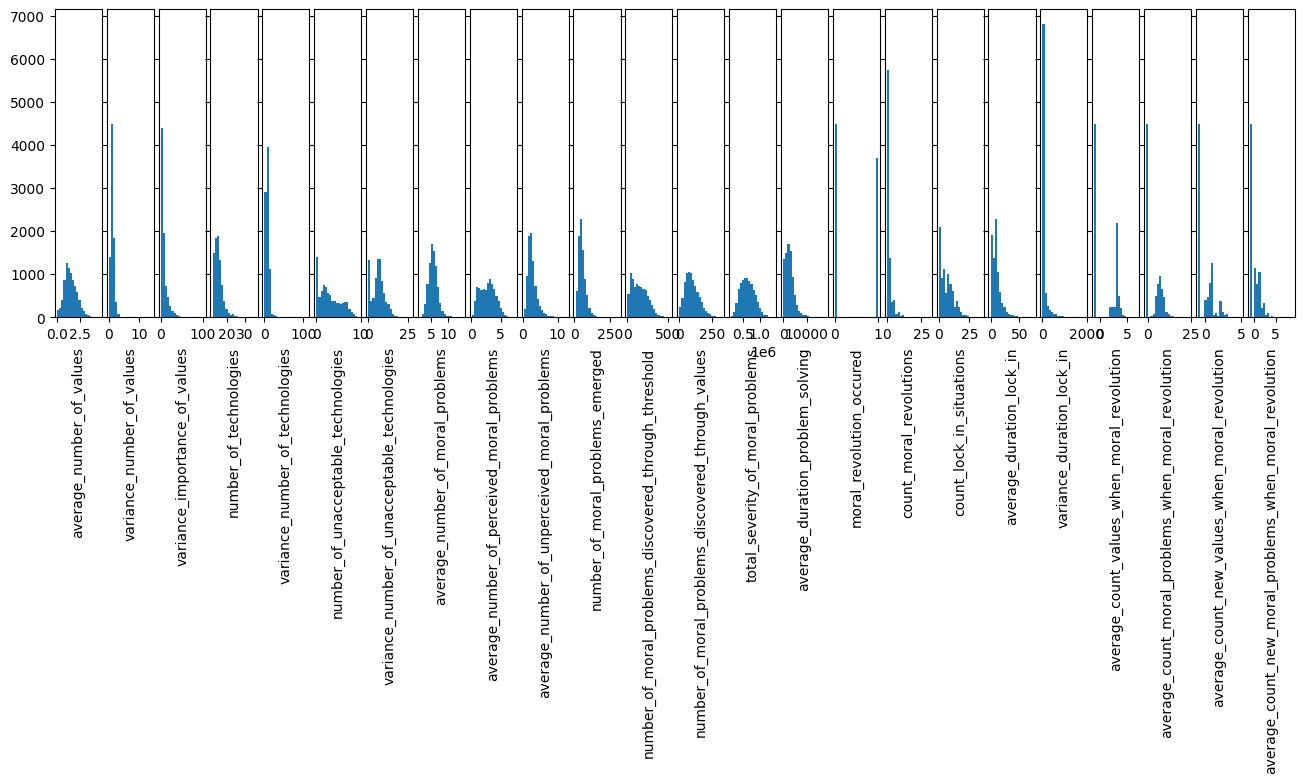

In [11]:
fig, ax = plt.subplots(1,len(df_results.columns), sharey=True)

for i, n in enumerate(df_results.columns):
    ax[i].hist(df_results[n], 20)
    ax[i].set_xlabel(n,rotation=90)
fig.set_size_inches(16,4)
fig.subplots_adjust(wspace=0.1)

plt.show()

interactive(children=(Dropdown(description='prim_outcome_header', options=('average_number_of_values', 'varian…

<function __main__.vis_kde(prim_outcome_header)>

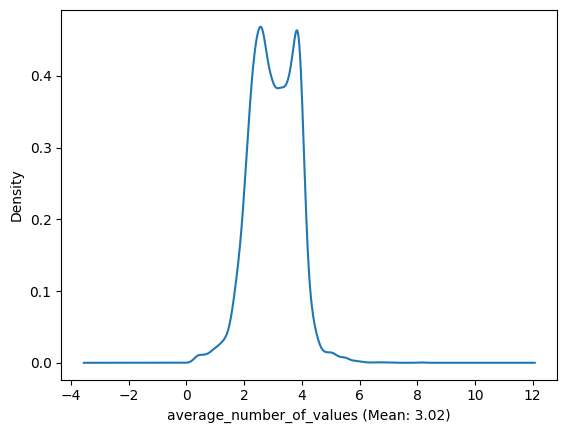

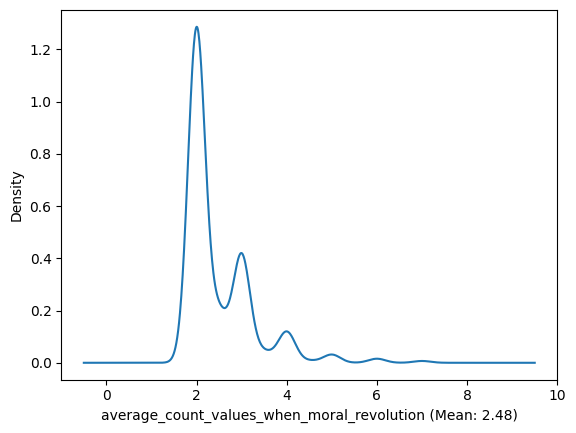

In [65]:
def vis_kde(prim_outcome_header):
    #df_results[prim_outcome_header].plot.kde()
    column_above_zero = df_results[df_results[prim_outcome_header] >= 0][prim_outcome_header]
    column_above_zero.plot.kde()

    #plt.xlabel(str(prim_outcome_header))
    #plt.xlabel(str(prim_outcome_header)+" (Mean: "+str(round(df_results[prim_outcome_header].mean(), 2))+")")
    plt.xlabel(str(prim_outcome_header)+" (Mean: "+str(round(column_above_zero.mean(), 2))+")")

widgets.interact(vis_kde, prim_outcome_header = df_results.keys().values.tolist())

# 2. Correlation analysis

##2.1. Output vs. Output

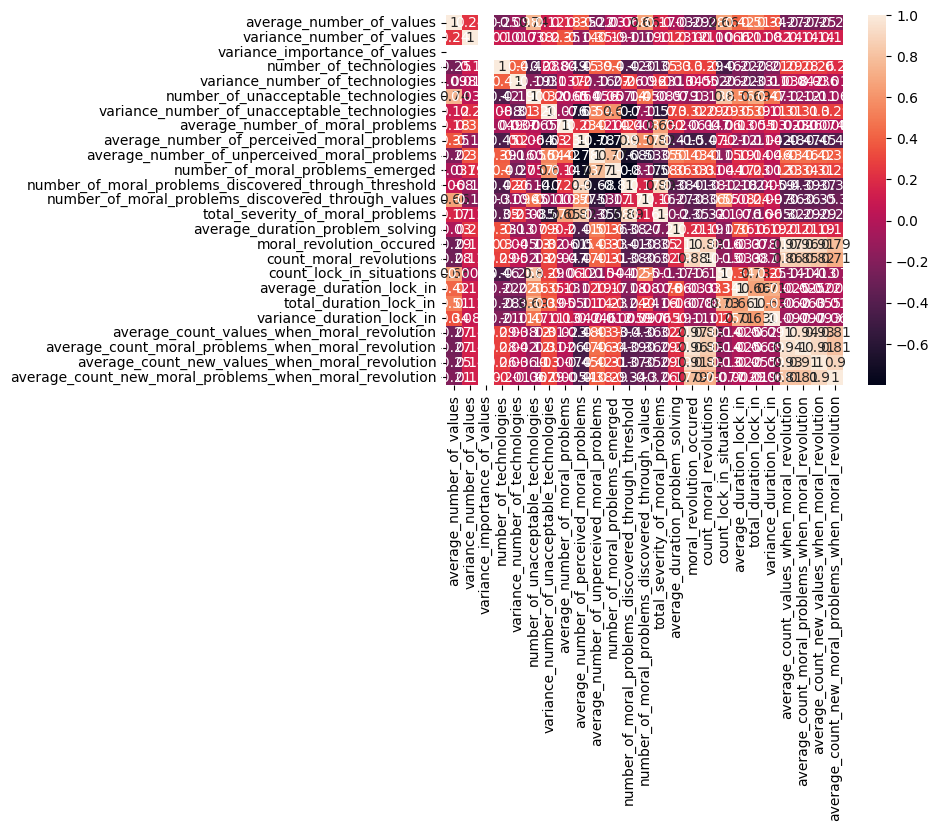

In [8]:
corr_matrix = df_results.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
def plot_input_output(output_variable_1, output_variable_2):
    d1 = df_results[output_variable_1]
    d2 = df_results[output_variable_2]
    combined_df = pd.concat([d1, d2], axis=1)
    if output_variable_1 != output_variable_2:
      #sns.lmplot(x=output_variable_1,y=output_variable_2,data=combined_df,fit_reg=True, line_kws={'color': 'red'}, scatter_kws={"s": 15}) 
      #sns.lmplot(x=output_variable_1,y=output_variable_2,data=combined_df, lowess=True, line_kws={'color': 'red'}, scatter_kws={"s": 15}) 
      sns.lmplot(x=output_variable_1,y=output_variable_2,data=combined_df, order=5, line_kws={'color': 'red'}, scatter_kws={"s": 15}) 

widgets.interact(plot_input_output, output_variable_1 = df_results.keys().values.tolist(), output_variable_2 = df_results.keys().values.tolist())

interactive(children=(Dropdown(description='output_variable_1', options=('average_number_of_values', 'variance…

<function __main__.plot_input_output(output_variable_1, output_variable_2)>

## 2.2. Input vs. Output

interactive(children=(Dropdown(description='input_variable', options=('random-seed', 'Openness_to_change', 'Pr…

<function __main__.plot_input_output(input_variable, output_variable)>

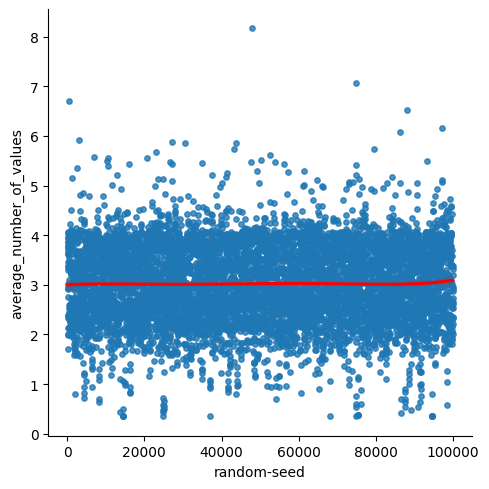

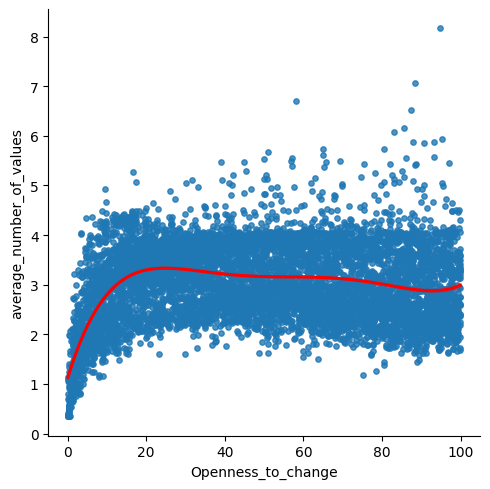

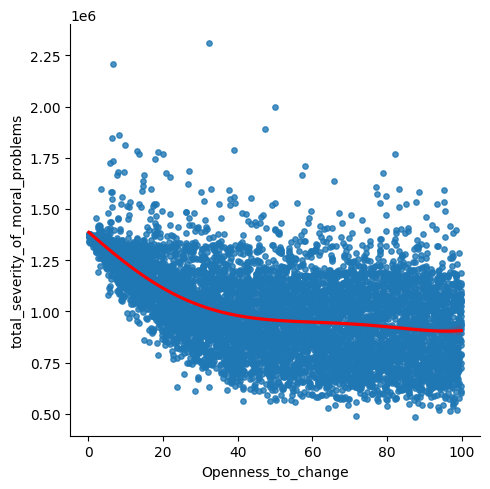

In [66]:
def plot_input_output(input_variable, output_variable):
    d1 = df_experiments[input_variable]
    d2 = df_results[output_variable]
    combined_df = pd.concat([d1, d2], axis=1)
    #sns.lmplot(x=input_variable,y=output_variable,data=combined_df,fit_reg=True, line_kws={'color': 'red'}, scatter_kws={"s": 15})  
    #sns.lmplot(x=input_variable,y=output_variable,data=combined_df, lowess=True, line_kws={'color': 'red'}, scatter_kws={"s": 15}) 
    sns.lmplot(x=input_variable,y=output_variable,data=combined_df, order=5, line_kws={'color': 'red'}, scatter_kws={"s": 15}) 

widgets.interact(plot_input_output, input_variable = df_experiments.keys().values.tolist(), output_variable = df_results.keys().values.tolist())

# 3. PRIM Analysis

In [8]:
pprint(df_results.keys().values.tolist())

['average_number_of_values',
 'variance_number_of_values',
 'variance_importance_of_values',
 'number_of_technologies',
 'variance_number_of_technologies',
 'number_of_unacceptable_technologies',
 'variance_number_of_unacceptable_technologies',
 'average_number_of_moral_problems',
 'average_number_of_perceived_moral_problems',
 'average_number_of_unperceived_moral_problems',
 'number_of_moral_problems_emerged',
 'number_of_moral_problems_discovered_through_threshold',
 'number_of_moral_problems_discovered_through_values',
 'total_severity_of_moral_problems',
 'average_duration_problem_solving',
 'moral_revolution_occured',
 'count_moral_revolutions',
 'count_lock_in_situations',
 'average_duration_lock_in',
 'variance_duration_lock_in',
 'average_count_values_when_moral_revolution',
 'average_count_moral_problems_when_moral_revolution',
 'average_count_new_values_when_moral_revolution',
 'average_count_new_moral_problems_when_moral_revolution']


In [9]:
prim_outcome_header = "total_severity_of_moral_problems"

<Axes: ylabel='Density'>

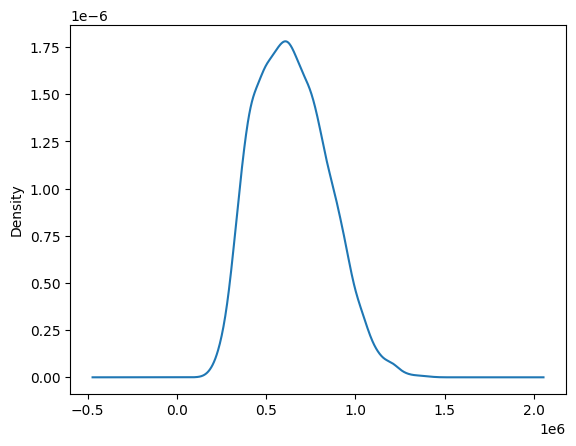

In [41]:
df_results[prim_outcome_header].plot.kde()
plt.xlabel(str(prim_outcome_header))


[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 8192 points remaining, containing 1361 cases of interest
[MainProcess/INFO] mean: 0.6328502415458938, mass: 0.050537109375, coverage: 0.19250551065393093, density: 0.6328502415458938 restricted_dimensions: 6


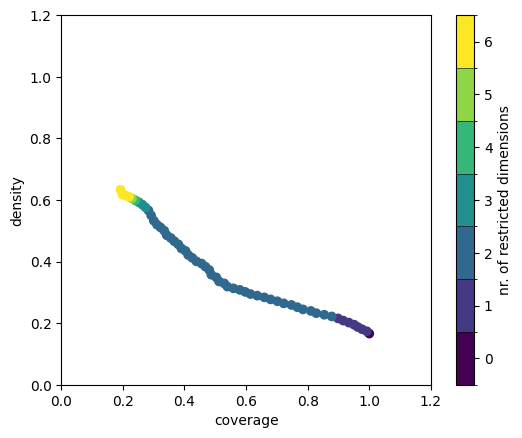

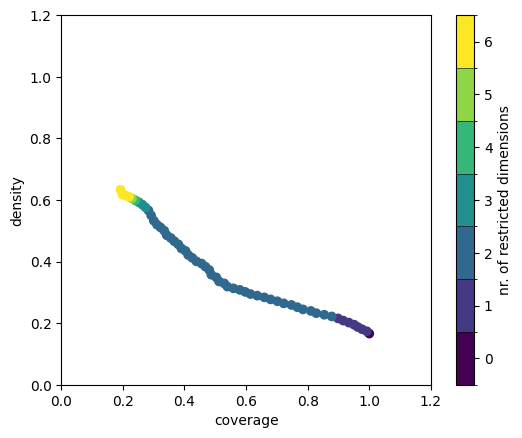

In [51]:
threshold_variable = 850000
y = df_results[prim_outcome_header] > threshold_variable
prim_alg = prim.Prim(df_experiments, y, threshold=0.6)
box1 = prim_alg.find_box()
box1.show_tradeoff()

Hereunder, change the 'y' so that the 'coverage' and 'density' returned are approximately similar.

In [1]:
y = 34

box1.inspect(y)
box1.inspect(y, style='graph')
plt.xlabel(str("Cases when "+str(prim_outcome_header)+ " >= "+str(threshold_variable)))
plt.show()

NameError: ignored

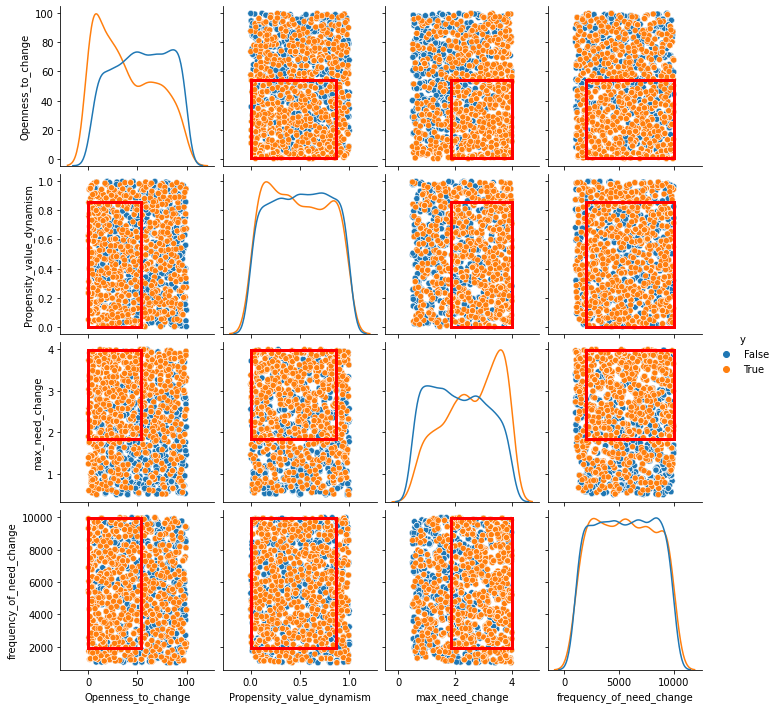

In [ ]:
box1.show_pairs_scatter(y)
plt.show()

# 4. Feature scoring
Feature scoring is a family of techniques often used in machine learning to identify the most relevant features to include in a model. This is similar to one of the use cases for global sensitivity analysis, namely factor prioritisation.

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because on

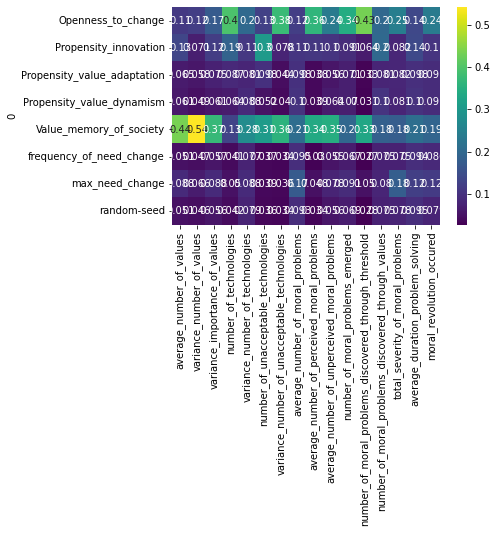

In [ ]:
fs = feature_scoring.get_feature_scores_all(df_experiments, df_results)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()